── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.1          ✔ dplyr   0.8.1     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
corrplot 0.84 loaded


Comunicacion,Educacion_Ceibal,GoogleMaps,Marketplace,Multimedia_musica,Multimedia_videos,Navegacion,Navegacion_Ceibal,Red_social,almacenamiento,correo,herramienta_educativa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,5,5,0,0,0,0,0
0,0,0,0,0,0,6,0,0,0,0,0
0,0,0,0,0,1,1,0,0,0,0,0


[1] "Si bien hay una correlacion alta entre red social/comunicacion y red social/navegacion, no es lo suficientemente alta"


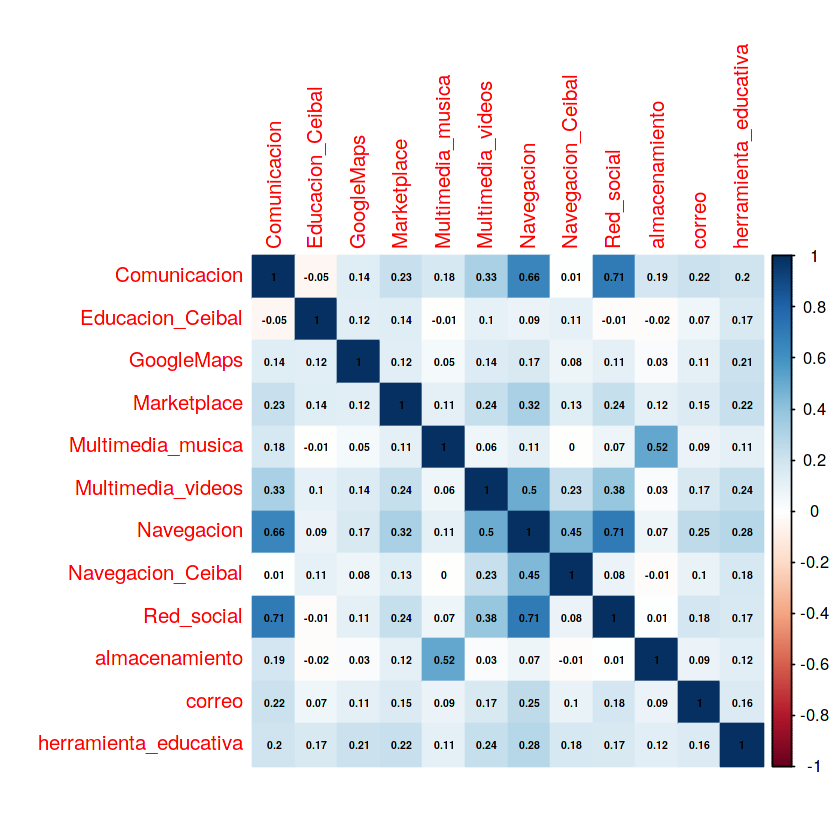

In [1]:
library(tidyverse)
library(corrplot)
library(cluster)
library(NbClust)

# 1) Carga de datos
data <- read.csv('../input/mediana_uso_diario.csv')
head(data,3)

set.seed(123)
sample<-sample_n(data,25000)

# 2) Eliminación de variables altamente correlacionadas para que no tengan demasiado peso.
# Se realiza la matriz de corr y se modifica alguna de las variables cuando hay dos con corr >80.
print('Si bien hay una correlacion alta entre red social/comunicacion y red social/navegacion, no es lo suficientemente alta')
corrplot(cor(data), method ="color", addCoef.col = "black", number.cex=0.5)


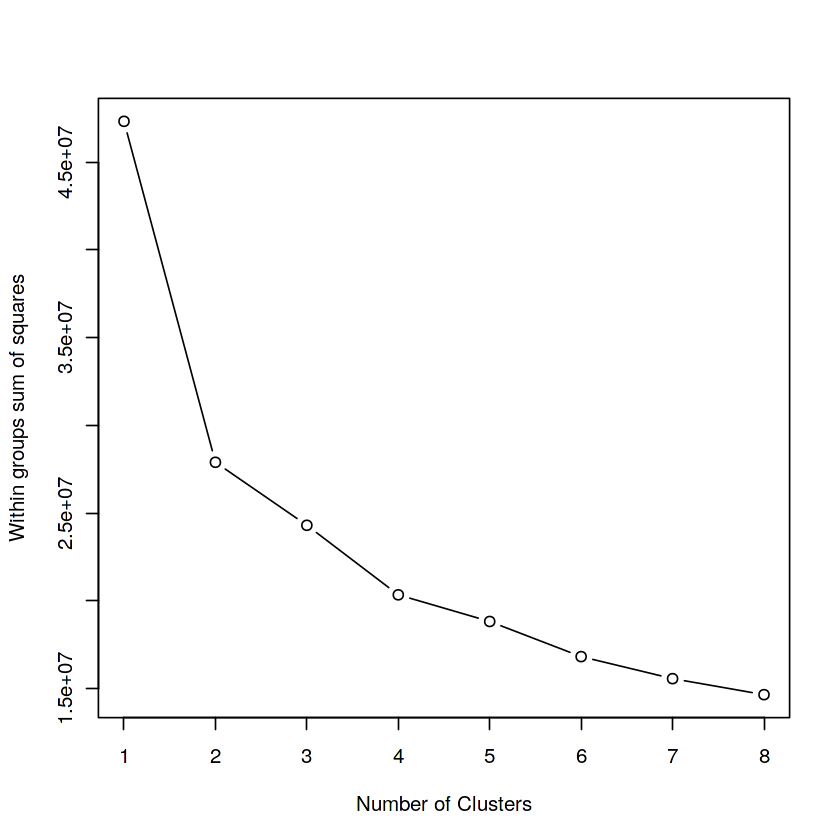

In [3]:
# 3) Acercamiento inicial a los clusters: veo kmeans y Clustering Jerárquico

# Miro elbow criterion para kmeans de los datos

wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}

wssplot(data, nc=8) 

In [ ]:
NbClust(data = head(sample,2500), diss = NULL, distance = "euclidean", min.nc = 3, max.nc = 5, 
method = "kmeans", index = "all", alphaBeale = 0.1)

[1] "cantidad de observaciones por cluster"


[1]  3304 14692    85  6919

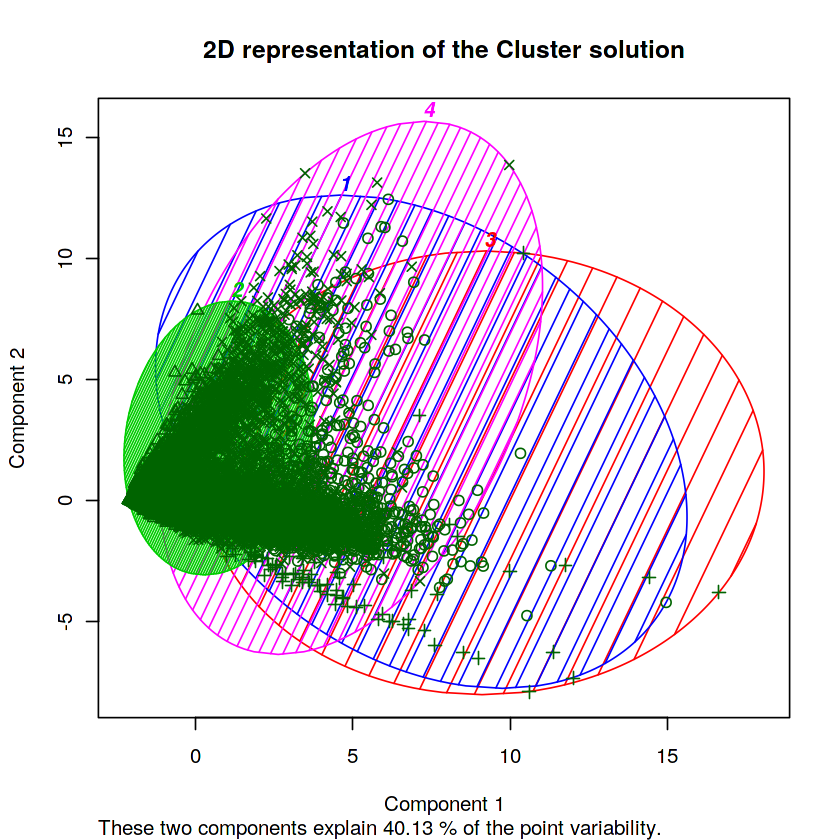

In [4]:
# K-Means
k.means.fit <- kmeans(sample, 4)
# Cluster size:
print('cantidad de observaciones por cluster')
k.means.fit$size
clusplot(sample, k.means.fit$cluster, main='2D representation of the Cluster solution',
         color=TRUE, shade=TRUE,
         labels=4, lines=0)

In [5]:
sil<-silhouette(k.means.fit$cluster,dist(sample))

In [7]:
summary(sil)

Silhouette of 25000 units in 4 clusters from silhouette.default(x = k.means.fit$cluster, dist = dist(sample)) :
 Cluster sizes and average silhouette widths:
      3304      14692         85       6919 
0.21300972 0.60383466 0.33596584 0.04622793 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.3300  0.1535  0.4204  0.3969  0.7015  0.7409 

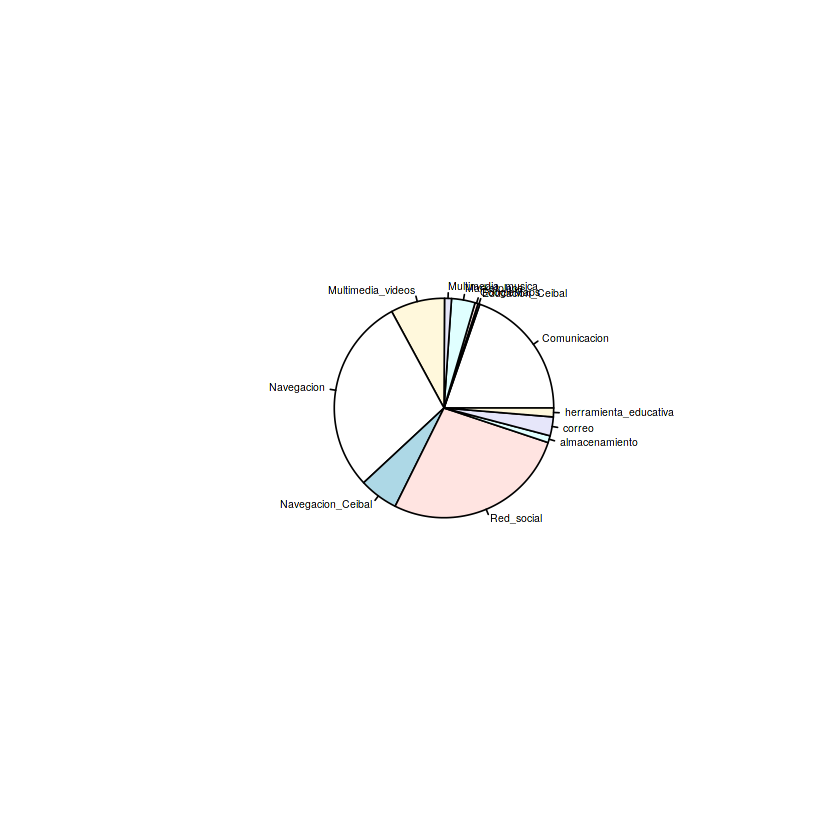

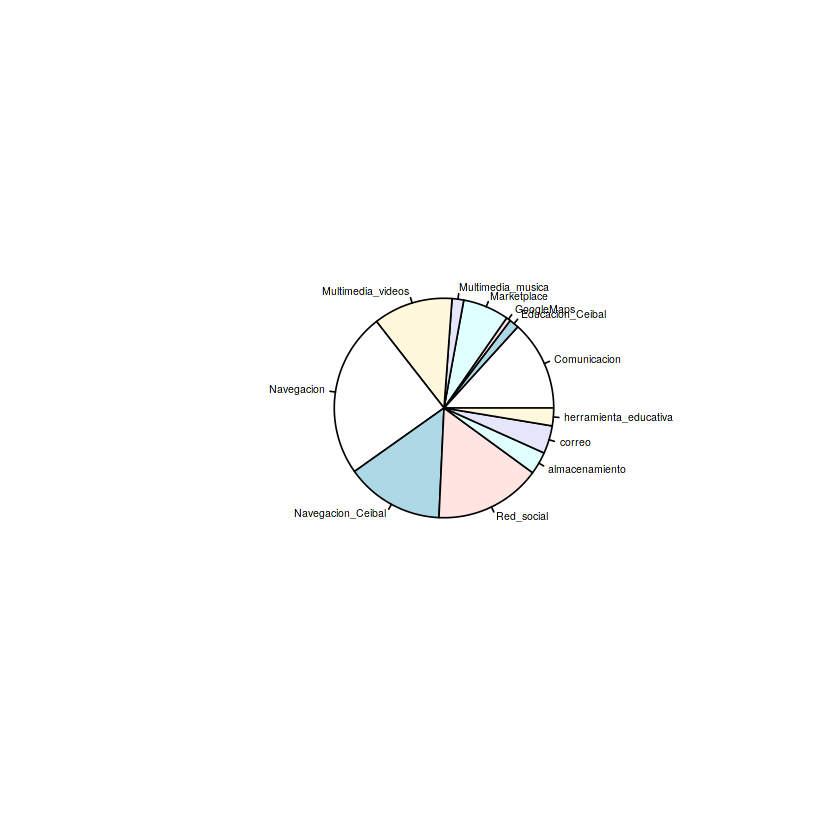

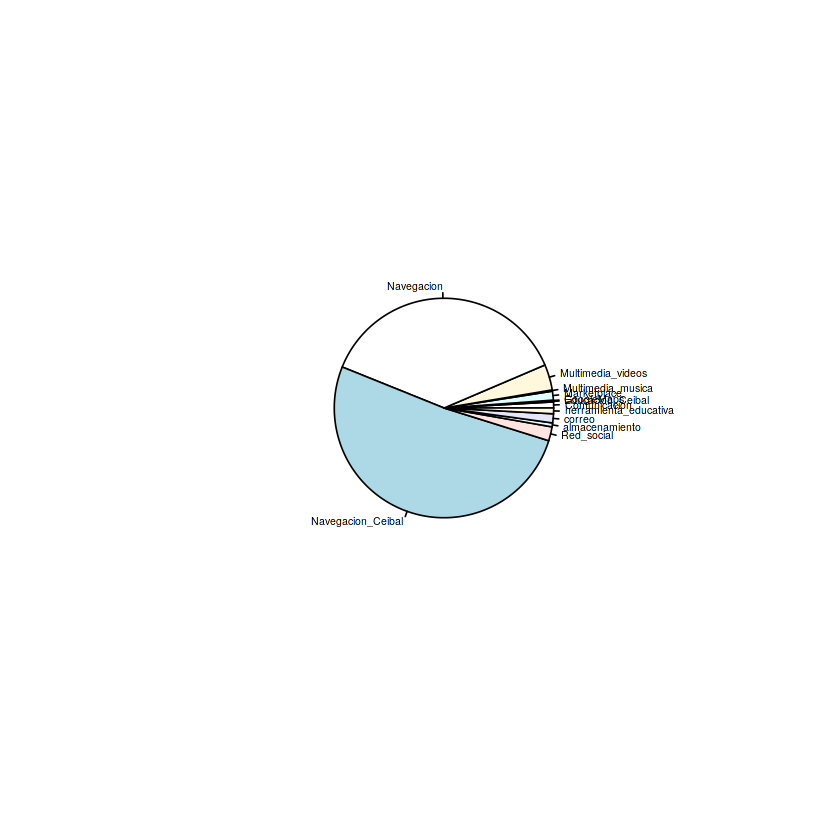

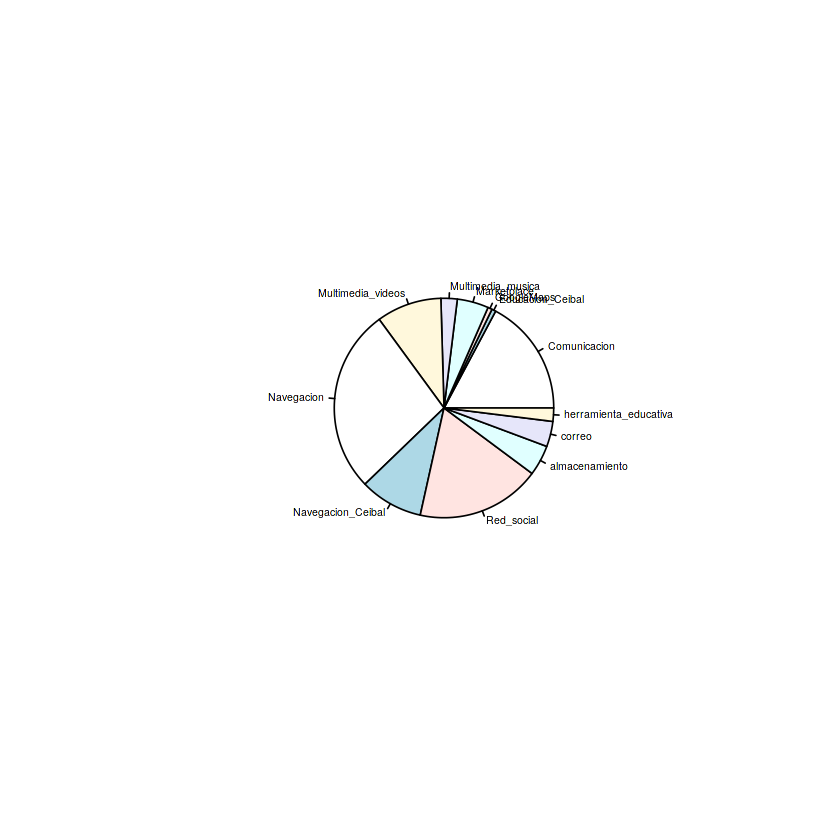

In [14]:
pie(colSums(sample[k.means.fit $cluster==1,]),cex=0.5)
pie(colSums(sample[k.means.fit $cluster==2,]),cex=0.5)
pie(colSums(sample[k.means.fit $cluster==3,]),cex=0.5)
pie(colSums(sample[k.means.fit $cluster==4,]),cex=0.5)

In [9]:
# Veo que pasa con un método de clustering jerárquico,por ejemplo aplicando la distancia función de distancia euclídea y método ward.D
d <- dist(sample, method = "euclidean")
H.fit <- hclust(d, method="ward.D")


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


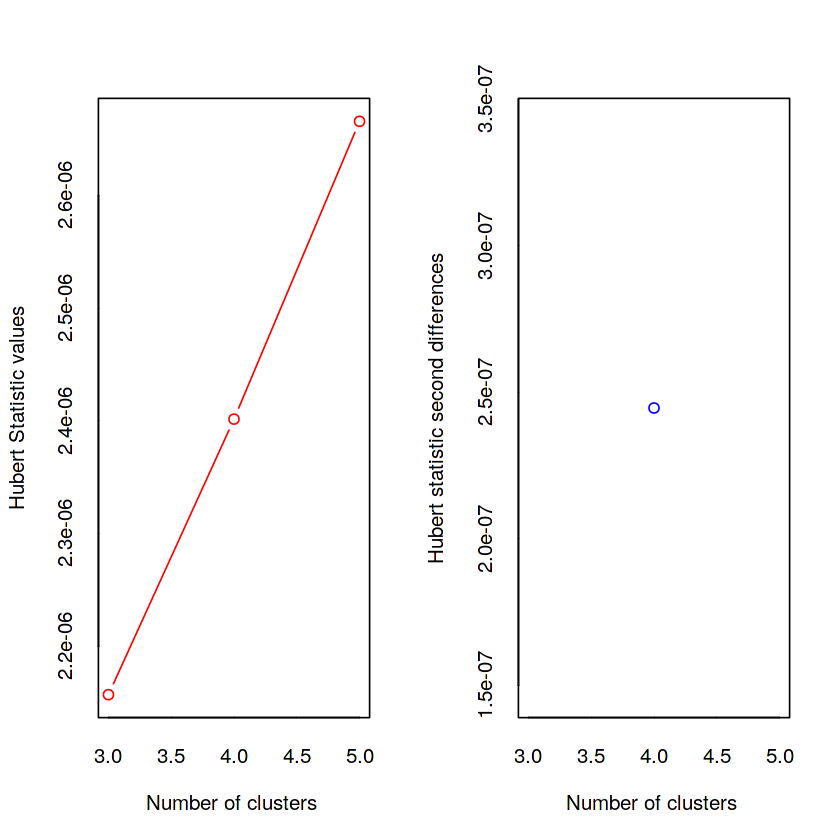

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 3 as the best number of clusters 
* 6 proposed 4 as the best number of clusters 
* 6 proposed 5 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


$All.index
      KL       CH Hartigan     CCC    Scott      Marriot     TrCovW   TraceW
3 4.0931 806.6569 220.4569  1.4900 5240.301 4.786843e+51 3412740069 472913.8
4 0.5178 670.2878 339.0263 -3.6709 6332.967 4.927848e+51 2951292681 425897.3
5 2.4216 672.5230 175.5149 -0.3723 7560.383 4.168187e+51 1682727108 364060.5
  Friedman  Rubin Cindex     DB Silhouette   Duda Pseudot2  Beale Ratkowsky
3  20.4546 2.9934 0.0710 1.4383     0.3114 0.8784 122.7534 1.1288    0.2253
4  23.0926 3.3239 0.0552 2.0583     0.2658 0.7846 131.8144 2.2378    0.2119
5  24.9349 3.8885 0.0520 1.7078     0.2817 0.7904 116.6785 2.1605    0.2099
       Ball Ptbiserial    Frey McClain   Dunn Hubert SDindex  Dindex   SDbw
3 157637.93     0.3941  0.1274  0.7188 0.0091      0  0.2451 11.0268 0.8953
4 106474.32     0.4513 -0.2677  0.8647 0.0091      0  0.3581 10.2756 0.8370
5  72812.11     0.4871 -0.0326  0.8019 0.0095      0  0.5113  9.9634 1.9390

$All.CriticalValues
  CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
3         0.9046            93.5017       0.3308
4         0.8895            59.6360       0.0082
5         0.8869            56.0850       0.0111

$Best.nc
                    KL       CH Hartigan  CCC    Scott       Marriot     TrCovW
Number_clusters 3.0000   3.0000   5.0000 3.00    5.000  4.000000e+00          5
Value_Index     4.0931 806.6569 163.5114 1.49 1227.417 -9.006659e+50 1268565573
                   TraceW Friedman  Rubin Cindex     DB Silhouette Duda
Number_clusters      4.00    4.000 4.0000  5.000 3.0000     3.0000   NA
Value_Index     -14820.21    2.638 0.2341  0.052 1.4383     0.3114   NA
                PseudoT2  Beale Ratkowsky     Ball PtBiserial Frey McClain
Number_clusters       NA 3.0000    3.0000     4.00     5.0000    2  3.0000
Value_Index           NA 1.1288    0.2253 51163.61     0.4871   NA  0.7188
                  Dunn Hubert SDindex Dindex  SDbw
Number_clusters 5.0000      0  3.0000      0 4.000
Value_Index     0.0095      0  0.2451      0 0.837

$Best.partition
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    1    2    3    2    2    1    2    2    1    2    1    1    1    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    1    2    1    2    2    1    1    1    1    1    2    2    2    1    1 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   2    1    2    1    2    2    1    2    1    2    1    2    2    1    1    1 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    1    3    2    2    1    1    2    2    2    2    1    3    2    2    2 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    2    2    1    2    1    3    2    1    2    2    3    2    1    1    1 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   1    1    2    1    2    2    2    2    1    2    2    2    1    3    1    2 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   2    2    2    2    1    2    1    1    1    2    3    1    1    2    1    2 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   2    2    2    3    2    2    1    1    1    2    2    1    2    2    1    2 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   1    1    1    2    2    1    1    1    1    1    2    3    3    1    2    3 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   1    2    1    2    2    1    3    2    1    2    1    2    2    1    1    2 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   1    1    3    1    1    3    2    1    2    2    1    1    2    2    1    1 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   1    1    2    2    1    2    1    1    1    2    1    1    1    1    1    2 
 193  194  195  196  197  198  199  200  201  202  

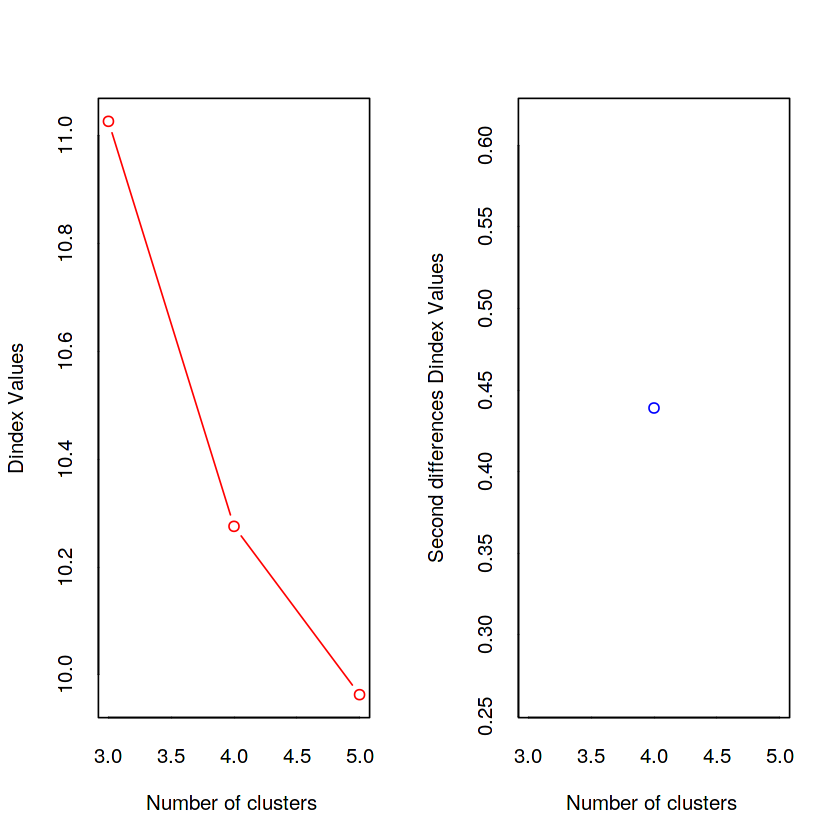

In [10]:
NbClust(data = head(sample,2000), diss = NULL, distance = "euclidean", min.nc = 3, max.nc = 5, 
method = "ward.D", index = "all", alphaBeale = 0.1)

[1] "Usando clústeres jerárquicos parece más conveniente 3 clústers"


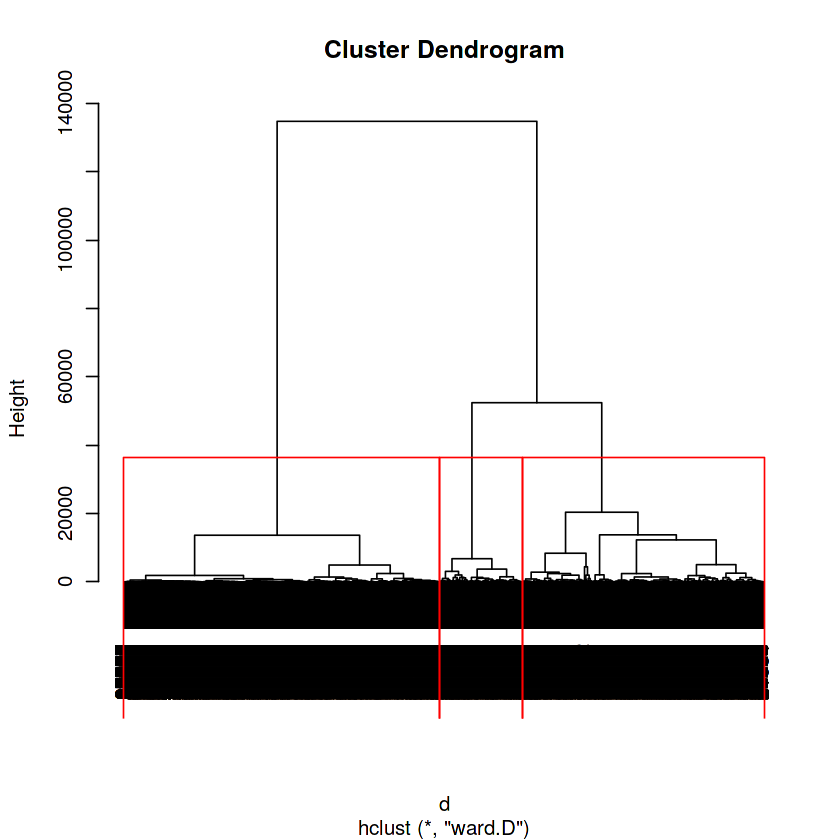

In [11]:
print('Usando clústeres jerárquicos parece más conveniente 3 clústers')

# gráfico
plot(H.fit) # dendograma
groups <- cutree(H.fit, k=3) # separo clusters
rect.hclust(H.fit, k=3, border="red") 


[1] "Al explorar los clústeres vemos que las particiones no son muy buenas, los perfiles definidos son peores que la aproximación inicial"


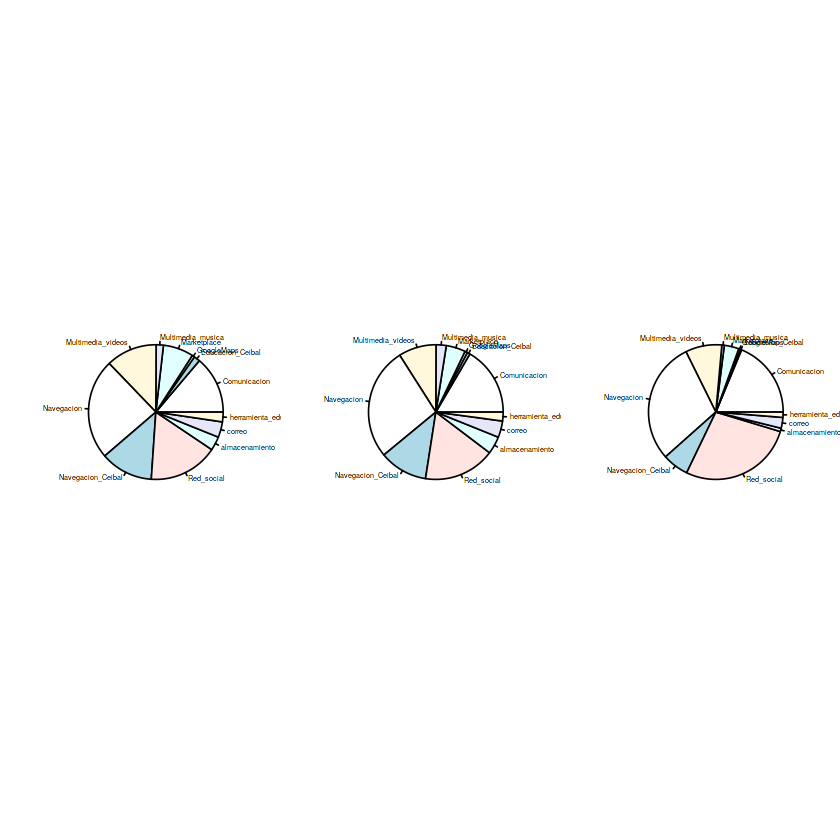

In [12]:
print('Al explorar los clústeres vemos que las particiones no son muy buenas, los perfiles definidos son peores que la aproximación inicial')
par(mfrow=c(1,3))
pie(colSums(sample[groups==1,]),cex=0.5)
pie(colSums(sample[groups==2,]),cex=0.5)
pie(colSums(sample[groups==3,]),cex=0.5)

In [13]:
sil<-silhouette(groups,dist(sample))
summary(sil)


Silhouette of 25000 units in 3 clusters from silhouette.default(x = groups, dist = dist(sample)) :
 Cluster sizes and average silhouette widths:
      12341        9444        3215 
 0.67872670 -0.08291961  0.24354699 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.70323  0.01923  0.38810  0.33504  0.73793  0.78769 